### PSC 204a	Fall 2015	Homework \#2
#### John Karasinski

#### 1) What are the formulas for SD? Describe in your own words what standard deviation describes in a distribution.


If the 'biased sample deviation' is used to compute an estimate of the population's standard deviation,

$$
s =\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}.
$$

An 'unbiased standard deviation' is given by applying Bessel's correction, using N−1 instead of N to yield,
$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}.
$$

where $N$ is the number of individuals in the sample, $x_i$ is an individual sample value, and $\overline{x}$ is the sample mean. Unless specifically mentioned below, the unbiased standard deviation has been used.


The standard deviation is a statistic that describes how tightly clustered the members of the distribution are clustered around the distribution's mean. A large standard deviation, for instance, indicates that members of the distribution have a large amount of spread from the mean. A small standard deviation, on the other hand, indicates that the members of the distribution are tightly located around the mean. A standard deviation of 0 indicates that all members of the distribution have the same value (which is also the mean).

#### 2) What expectations do we have given the central limit theorem (i.e., what are the claims of the central limit theorem)? In your own words explain what these expectations mean and why they make sense conceptually.


The central limit theorem states that the addition of a large enough number of random variables, regardless of their underlying distribution, will lead to a normal distribution. The mean of the resultant normal distribution will be the mean of the original underlying distribution, and the standard deviation of the resultating normal distribution is equal to the standard deviation of the original underlying distribution divided by the square-root of N.

This makes sense conceptually because it precisely describes how we expect measurements work in experiments. In experiments we attempt to measure some unknown value, but instead find the unknown value plus some amount of measurement error. Repeated measurements will again return the unknown value plus some other random measurement error. When we take many measurements like this and take the average, we find a result that is as close to the actual unknown value as we can measure.

#### 3) a. Create a histogram of weight. Create a unique figure title and label the x-axis.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('HW01Data.csv')

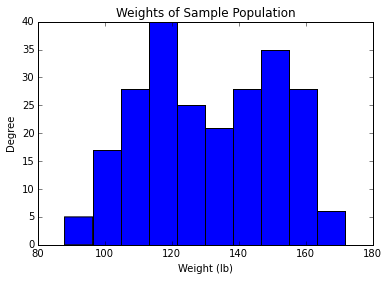

In [2]:
# A historgram is created by passing in kind='hist' to the plot function
df.plot(kind='hist', y='weight_lbs', legend=False)
plt.title('Weights of Sample Population')
plt.xlabel('Weight (lb)')
plt.show()

This plot suggests that the data is bimodal. A likely cause of this bimodal distribution is that it's actually the sum of two distributions, one for males and one for females. As such, the mean and median's marked in the graph are likely not representitive of either the average male or the average female.

#### b. Create a density plot of height. Create a unique figure title and label the x-axis. Add a solid black vertical line to the plot at the mean value of height. Add a dotted black vertical line to the plot at the median value of height. *Make sure you look at the lines() function syntax to learn about the argument for line types.

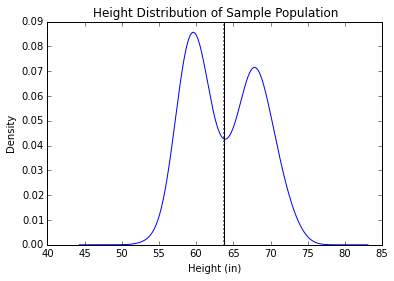

In [3]:
# A density plot is created by passing in kind='kde', which stands for kernel density estimation
df.plot(kind='kde', y='height_in', legend=False)
plt.title('Height Distribution of Sample Population')
plt.xlabel('Height (in)')

# The axvline function draws a vertical line on the current plot axis
plt.axvline(df.height_in.mean(), color='black')
plt.axvline(df.height_in.median(), color='black', linestyle='dotted')
plt.show()

Here we again see a bimodal distribution due to differences in gender. While the mean and median are therefore accurate for the population, they're not necessarily representative of the subgroups in the population.

#### 4) Calculate the mean, median, variance, minimum, and maximum values of BMI for each unique condition of biological sex and education completed—you’ll need to calculate BMI again using the formula provided in HW01 (if you saved your syntax you can copy and paste that). Summarize these values in a table. Comment on how these groups compare on these statistics.

In [4]:
df['bmi'] = df.apply(lambda x: (x['weight_lbs']/x['height_in']**2) * 703, axis=1)
print(df.groupby(('biosex', 'ed_cmplt')).bmi.agg(['mean', 'median', 'var', 'min', 'max']))

                        mean     median       var        min        max
biosex ed_cmplt                                                        
FEMALE College2YR  23.013821  22.371433  3.908364  20.281319  25.973420
       College4YR  22.838584  22.979353  5.056110  18.099274  27.748731
       HS          22.728031  22.732402  8.640603  18.147567  26.777365
       MA          22.091436  22.292065  6.016555  16.932930  26.235072
       PhD         23.480749  24.045792  6.674042  17.626489  27.536907
MALE   College2YR  22.419280  22.168032  5.757190  18.430776  30.227456
       College4YR  22.038994  21.949803  2.498297  19.095423  24.799519
       HS          23.106290  22.723011  6.514539  16.839152  28.096583
       MA          23.206360  24.089050  5.899063  17.711650  26.195594
       PhD         22.745859  22.467367  3.279681  18.260705  27.878717


There does not appear to be any obvious correlations between BMI and a combination between gender and the level of education completed. While various stastical fluctuations exist, each group has a very small N. Due to this small N, these values have fairly large error bars attached to them, making it hard to draw real conclusions.

#### 5) a. Identify the rows with the maximum and minimum BMI values. What are the row numbers and the maximum and minimum BMI values?

In [5]:
# Note that R is 1 based and Python is 0 based
print('Row Numbers\nMax: {}, Min: {}'.format(df.bmi.idxmax(), df.bmi.idxmin()))

# Check to make sure this seems reasonable
print('\nValues\nMax: {:.2f}, Min: {:.2f}'.format(df.xs(df.bmi.idxmax()).bmi, 
                                                  df.xs(df.bmi.idxmin()).bmi))

Row Numbers
Max: 62, Min: 71

Values
Max: 30.23, Min: 16.84


#### b. Standardize BMI values so that they have a mean of zero and standard deviation of one. Now identify the rows with the maximum and minimum standardized BMI values. What are the row numbers and what are the maximum and minimum standardized BMI values?

In [6]:
df['standard_bmi'] = (df.bmi - df.bmi.mean()) / df.bmi.std()

# Check that we have standardized correctly
print('Mean: {}, STD: {}'.format(df.standard_bmi.mean(), df.standard_bmi.std()))

# Note that R is 1 based and Python is 0 based
print('Max: {}, Min: {}'.format(df.standard_bmi.idxmax(), df.standard_bmi.idxmin()))

Mean: -6.118138899651078e-16, STD: 0.9999999999999954
Max: 62, Min: 71


#### c. Standardize BMI values so that the mean is 100 and the standard deviation is 15. Identify the rows with the maximum and minimum standardized BMI values. What are the row numbers and what are the maximum and minimum standardized BMI values.

In [7]:
df['strange_bmi'] = 100 + (df.bmi - df.bmi.mean()) / (1/15 * df.bmi.std())

# Check that we have standardized correctly
print('Mean: {}, STD: {}'.format(df.strange_bmi.mean(), df.strange_bmi.std()))

# Note that R is 1 based and Python is 0 based
print('Max: {}, Min: {}'.format(df.strange_bmi.idxmax(), df.strange_bmi.idxmin()))

Mean: 100.0, STD: 14.999999999999867
Max: 62, Min: 71


#### d. What conclusions can you draw about linear transformations of data based on your answers to the preceding questions (i.e., 5a-5c)?

Linear transformations of data will generally not change the location of the maximum and minimum value locations, but can allow for the manipulation of calculated aggregations, such as the mean and the standard deviation.